In [5]:
from PIL import Image
import numpy as np
from skimage.morphology import skeletonize
from skimage import img_as_bool
image_path = '/home/shaohang/Downloads/2024_small.jpg'

# # Allow image size to exceed default PIL limit
# ImageFile.LOAD_TRUNCATED_IMAGES = True
Image.MAX_IMAGE_PIXELS = None  # Caution: Only do this if you're sure it's safe!


# Load the image
original_image = Image.open(image_path)

# Convert image to grayscale
gray_image = original_image.convert('L')

# Threshold the image
threshold = 128
binary_image = gray_image.point(lambda x: 255 if x > threshold else 0, '1')

# Convert binary image to boolean array
binary_array = img_as_bool(binary_image)

# Perform skeletonization
skeleton = skeletonize(binary_array)

# Extract the coordinates
y, x = np.where(skeleton)
coordinates = list(zip(x, y))
coordinates = np.array(coordinates)

import matplotlib.pyplot as plt
plt.scatter(coordinates[:,0], coordinates[:,1])
plt.show()

Image shape: (14882, 26883)


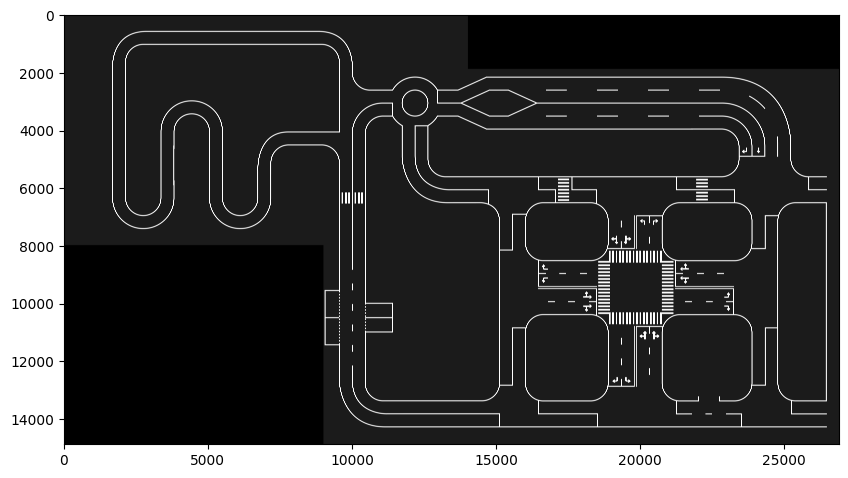

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/home/shaohang/Downloads/4.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

print('Image shape:', image.shape)

# Define the coordinates of the top-left and bottom-right corners of the square
top_left_corner = (0, 8000)
bottom_right_corner = (9000, 14882)

# Make a copy of the original image to draw on
image_with_square = image.copy()

# Draw a black rectangle (square) on the image
# (0, 0, 0) is the color of the square (black) and -1 specifies that the square should be filled
cv2.rectangle(image_with_square, top_left_corner, bottom_right_corner, (0, 0, 0), -1)

# Define the coordinates of the top-left and bottom-right corners of the square
top_left_corner = (14000, 0)
bottom_right_corner = (26883, 1900)

# Draw a black rectangle (square) on the image
# (0, 0, 0) is the color of the square (black) and -1 specifies that the square should be filled
cv2.rectangle(image_with_square, top_left_corner, bottom_right_corner, (0, 0, 0), -1)

# Display the image with the black square
plt.figure(figsize=(10, 10))
plt.imshow(image_with_square, cmap='gray')
plt.show()

In [54]:
meter_per_pixel = (0.35 / (1035 - 621)) / 1.169

print(14882 * meter_per_pixel)
print(26883 * meter_per_pixel)

10.762532905204084
19.441551679250193


(13885, 2)


/tmp/ipykernel_38947/2572271426.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


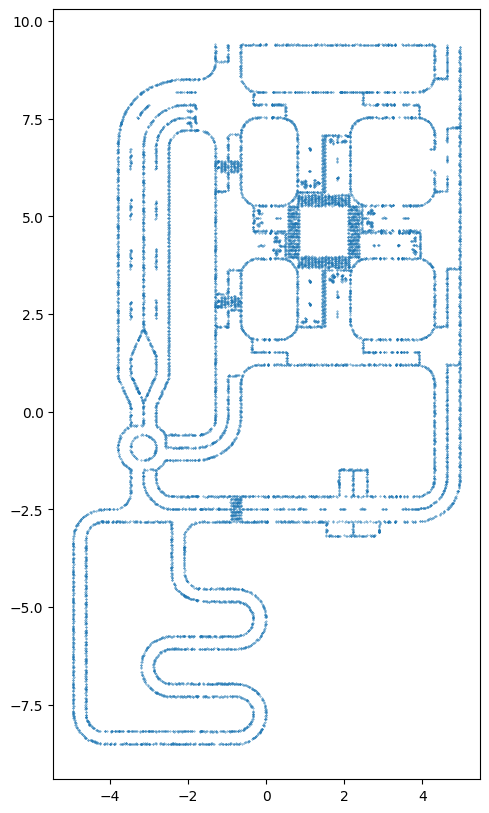

In [52]:
meter_per_pixel = (0.35 / (1035 - 621)) / 1.169

# Threshold the image to get binary image
_, binary_image = cv2.threshold(image_with_square, 128, 255, cv2.THRESH_BINARY)

# Find the white pixel coordinates
white_pixels = np.column_stack(np.where(binary_image == 255))

# If the y-coordinate should not be flipped, we can use the original white_pixels without transformation
original_coordinates = white_pixels - [14882 / 2, 26883 / 2]

downsample_factor = 1000
downsampled_coordinates = original_coordinates[::downsample_factor]
downsampled_coordinates = downsampled_coordinates.astype(np.float32)
downsampled_coordinates *= meter_per_pixel
print(downsampled_coordinates.shape)
plt.figure(figsize=(10, 10))
plt.scatter(downsampled_coordinates[:, 0], downsampled_coordinates[:, 1], s=0.1)
plt.axes().set_aspect('equal')
plt.show()



In [53]:
for coo in downsampled_coordinates:
    if coo[1] < (-4.95) and coo[1] > (-5.015):
        print(coo)

[-4.955307  -4.9701324]
[-4.945905 -4.988212]
[-4.9372272 -4.950606 ]
[-4.6211925 -4.9976134]
[-4.6139607 -4.9817033]
[-0.4823686 -4.956392 ]
[-0.47947583 -4.9679627 ]
[-0.47658306 -4.9824266 ]
[-0.449825 -5.010631]
[-0.43753073 -5.0099077 ]
[-0.09112211 -4.9679627 ]
[-0.08605976 -4.9751945 ]
[-0.07448871 -4.998337  ]
[-0.05568573 -5.0012293 ]


In [33]:
from pyproj import Proj, Transformer

def transform_points(cartesian_points):
    # Define the WGS84 geographic coordinate system
    proj_wgs84 = Proj(proj='latlong', datum='WGS84')

    # Define a local Cartesian projection centered at 0 degrees lat, 0 degrees lon
    proj_cartesian = Proj(proj='aeqd', lat_0=0, lon_0=0, datum='WGS84', units='m')

    # Create a transformer to convert from Cartesian to WGS84 geographic coordinates
    transformer = Transformer.from_proj(proj_cartesian, proj_wgs84)

    # Convert the Cartesian coordinates to latitude and longitude
    geo_points = [transformer.transform(y, x) for x, y in cartesian_points]

    # Prepare the OSM XML content
    osm_xml_content = '<osm version="0.6" generator="Custom Script">\n'
    for idx, (lat, lon) in enumerate(geo_points, start=1):
        osm_xml_content += f'  <node id="{-idx}" lat="{lat}" lon="{lon}" />\n'
    osm_xml_content += '</osm>'

    # write the OSM XML content to a file
    with open('road_2024.osm', 'w') as file:
        file.write(osm_xml_content)

In [ ]:
transform_points(downsampled_coordinates)

In [ ]:
# List of Cartesian coordinates to be converted
cartesian_points = [(3, 1), 
                    (2, 1), 
                    (1, 1), 
                    (1, 2),
                    (1, 3),
                    (3, 0),
                    (2, 0),
                    (1, 0),
                    (0, 0),
                    (0, 1),
                    (0, 2),
                    (0, 3)]

transform_points(cartesian_points)

In [ ]:
import matplotlib.pyplot as plt

points = [[3, 0],
          [2.5, 0],
          [2, 0],
          [1.5, 0],
          [1, 0],
          [0.35, 0],
          [0, 0],
          [0, 0.35],
          [3, 0.35],
          [2.5, 0.35],
          [2, 0.35],
          [1.5, 0.35],
          [1, 0.35],
          [0.35, 0.35],
          [0, 1],
          [0, 1.5],
          [0, 2],
          [0, 2.5],
          [0, 3],
          [0, 3.65],
          [0, 4],
          [0.35, 1],
          [0.35, 1.5],
          [0.35, 2],
          [0.35, 2.5],
          [0.35, 3],
          [0.35, 3.65],
          [0.35, 4],
          [0.35, 4.35],
          [0, 4.35],
          [-0.35, 4],
          [-0.8, 4],
          [-1.3, 4],
          [-1.65, 4],
          [-0.35, 4.35],
          [-0.8, 4.35],
          [-1.3, 4.35],
          [-1.65, 4.35],
          [-2, 4.35],
          [-2, 4],
          [-1.65, 3.65],
          [-1.65, 3],
          [-1.65, 2.5],
          [-1.65, 2],
          [-1.65, 1.5],
          [-1.65, 1],
          [-1.65, 0.35],
          [-1.65, 0],
          [-2, 3.65],
          [-2, 3],
          [-2, 2.5],
          [-2, 2],
          [-2, 1.5],
          [-2, 1],
          [-2, 0.35],
          [-2, 0],
          [-1.65, -0.35],
          [-1.65, -1],
          [-1.65, -1.25],
          [-2, -0.35],
          [-2, -1],
          [-2, -1.25],
          [-1.3, 0],
          [-0.8, 0],
          [-0.35, 0],
          [-1.3, -0.35],
          [-0.8, -0.35],
          [-0.35, -0.35],
          [0, -0.35],
          [3, -0.35],
          [2.5, -0.35],
          [2, -0.35],
          [1.5, -0.35],
          [1, -0.35],
          [0.35, -0.35],
          [0.35, -1],
          [0.35, -1.25],
          [0, -1],
          [0, -1.25],
          [-0.35, -1],
          [-0.35, -1.25],
          [-1.3, -1],
          [-1.3, -1.25],
          [-0.35, 0.35],
          [-0.35, 1],
          [-0.35, 1.5],
          [-0.35, 2],
          [-0.35, 2.5],
          [-0.35, 3],
          [-0.35, 3.65],
          [-1.3, 0.35],
          [-1.3, 1],
          [-1.3, 1.5],
          [-1.3, 2],
          [-1.3, 2.5],
          [-1.3, 3],
          [-1.3, 3.65],
          [-0.8, 0.35],
          [-0.8, 3.65]
          ]

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax.plot([x for x, y in points], [y for x, y in points], 'o')

transform_points(points)

In [ ]:
import lanelet2
from pyproj import Proj, transform

# Define the projector with the origin
projector = lanelet2.projection.UtmProjector(lanelet2.io.Origin(0, 0))

# Load the map using Lanelet2
map = lanelet2.io.load("test.osm", projector)

# for points in map.pointLayer:
#     print(points)

lanelet_1 = map.laneletLayer[1]
lanelet_2 = map.laneletLayer[2]

for point in list(lanelet_2.centerline):
    print(point.x, point.y)

print()
for point in list(lanelet_1.centerline):
    print(point.x, point.y)

# traffic_rules = lanelet2.traffic_rules.create(lanelet2.traffic_rules.Locations.Germany,
#                                                   lanelet2.traffic_rules.Participants.Vehicle)
# routing_graph = lanelet2.routing.RoutingGraph(map, traffic_rules)
# route = routing_graph.getRoute(lanelet_1, lanelet_2)
# for lanelet_relation in route.followingRelations(lanelet_1):
#     print(lanelet_relation.lanelet.id)

In [3]:
a = "1,2"
len(a)

3

/tmp/ipykernel_7940/2465320262.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


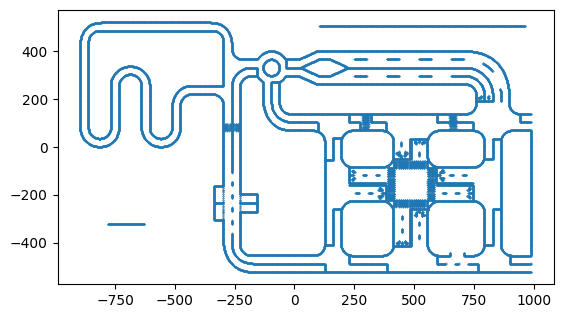

In [2]:
import numpy as np
import matplotlib.pyplot as plt

points = []
# read txt file of tuples
def read_txt(file_path):
    with open(file_path, 'r') as file:
        content = file.read()
    content = content.split('\n')
    points = []
    for tup_str in content:
        # tup_str = tup_str[1:-1]
        tup = tup_str.split(',')
        tup = [float(x) for x in tup]
        points.append(tup)
    points = np.array(points)
    return points

file_path = '/home/shaohang/Downloads/adjusted_coordinates.txt'
points = read_txt(file_path)
plt.scatter(points[:, 0], points[:, 1], s=0.1)
plt.axes().set_aspect('equal')

/tmp/ipykernel_7940/1294243377.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


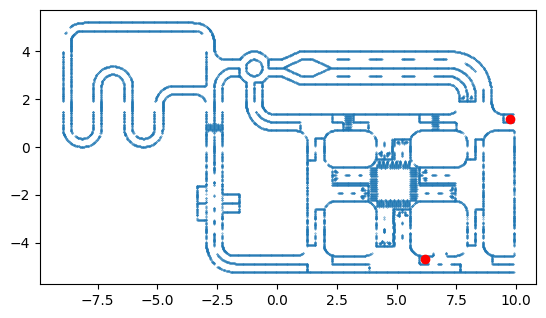

<Figure size 9000x9000 with 0 Axes>

In [18]:
new_points = []
for point in points:
    if (point[0] > 0) and (point[1] > 400):
        continue
    if (point[0] < -500) and (point[1] < -200):
        continue
    new_points.append(point)
new_points = np.array(new_points) * 0.01 
new_points = new_points[::2]
plt.plot(9.75, 1.16, "ro")
plt.plot(6.2, -4.7, "ro")
plt.scatter(new_points[:, 0], new_points[:, 1], s=0.1)
plt.axes().set_aspect('equal')
plt.figure(dpi=300, figsize=(30, 30))
plt.show()

In [34]:
transform_points(new_points)